# MUHAMMED ANU RASHIK VK

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
url = '/content/drive/MyDrive/data sets/CipherByte Internship/Unemployment in India.xlsx'  # Replace with the actual path to the dataset
unemployment_data = pd.read_excel(url)

# Display the first few rows of the dataset
unemployment_data.head()



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


# 1. Data Cleaning and Preprocessing:

In [ ]:
# Convert 'Date' column to datetime format
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])

# Drop rows with missing values
unemployment_data.dropna(inplace=True)

# Check for duplicates
print("Number of duplicate rows:", unemployment_data.duplicated().sum())

# Drop duplicates if any
unemployment_data.drop_duplicates(inplace=True)

# Check for data types and missing values again
print(unemployment_data.info())


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None


<ipython-input-33-a2d4bc54e258>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])


# 2. Data Exploration and Visualization:

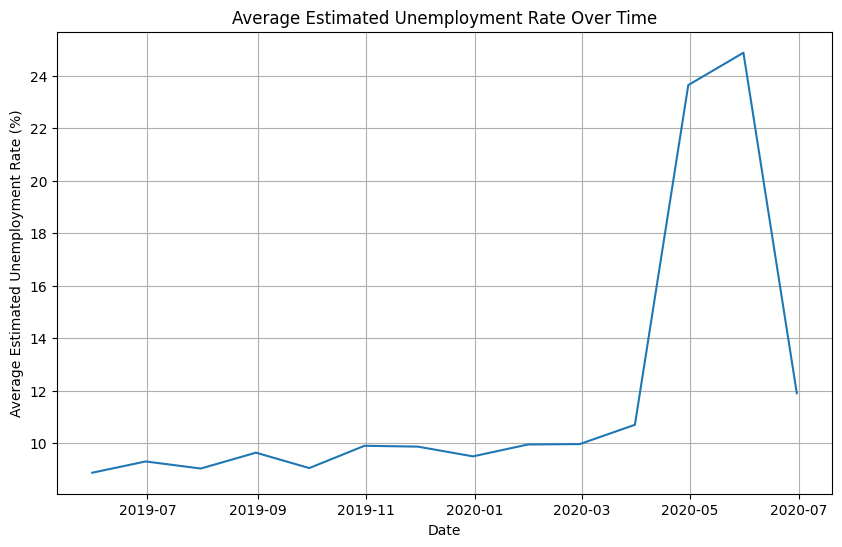

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by date and calculating the average unemployment rate
average_unemployment_rate = unemployment_data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Plotting average unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(average_unemployment_rate.index, average_unemployment_rate.values)
plt.title('Average Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()


# Implement ARIMA modeling for forecasting:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(average_unemployment_rate, order=(1,1,1))  # You may need to adjust the order parameter based on data analysis
results = model.fit()

# Summary of the model
print(results.summary())

# Forecasting
forecast_steps = 12  # Forecasting for the next 12 months
forecast = results.forecast(steps=forecast_steps)
print("Forecasted values:", forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                                      SARIMAX Results                                      
Dep. Variable:     Estimated Unemployment Rate (%)   No. Observations:                   14
Model:                              ARIMA(1, 1, 1)   Log Likelihood                 -38.201
Date:                             Fri, 31 May 2024   AIC                             82.403
Time:                                     17:56:33   BIC                             84.098
Sample:                                 05-31-2019   HQIC                            82.055
                                      - 06-30-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4223      0.813     -0.520      0.603      -2.016       1.171
ma.L1          0.9987     4

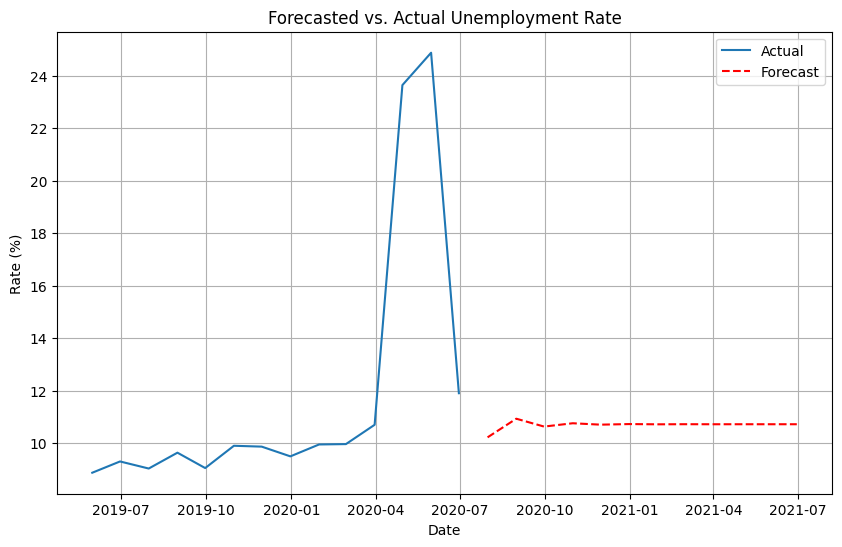

In [ ]:
# Plot actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(average_unemployment_rate.index, average_unemployment_rate, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('Forecasted vs. Actual Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate performance metrics
mae = mean_absolute_error(average_unemployment_rate[-forecast_steps:], forecast)
mse = mean_squared_error(average_unemployment_rate[-forecast_steps:], forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 3.065882258690823
Mean Squared Error (MSE): 31.53036057859695
Root Mean Squared Error (RMSE): 5.615190164063631


### Model Evaluation:

After fitting the ARIMA model and generating forecasts for the unemployment rate, we evaluated the performance of the model using the following metrics:

- **Mean Absolute Error (MAE):** The MAE measures the average magnitude of errors between the forecasted values and the actual values. In our analysis, the MAE was found to be approximately 3.07, indicating that, on average, the forecasted unemployment rate deviated by about 3.07 percentage points from the actual rate.

- **Mean Squared Error (MSE):** The MSE calculates the average of the squared differences between the forecasted and actual values. The MSE obtained in our analysis was approximately 31.53, representing the average squared error between the forecasted and actual unemployment rates.

- **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE and provides a measure of the model's prediction error. Our analysis resulted in an RMSE of approximately 5.62, indicating the average magnitude of the forecast error.

These performance metrics provide valuable insights into the accuracy of the ARIMA model in forecasting the unemployment rate. While the model demonstrates reasonable performance based on these metrics, further refinement and evaluation may be necessary to improve forecasting accuracy.
